In [0]:
from PIL import Image, ImageDraw
img = Image.open('signature.png')           #open image using PIL function
threshold = 128                             #set threshold of 128 to filter pixels into black/white
fn = lambda x : 255 if x > threshold else 0
sig = img.convert('L').point(fn, mode='1')  # use mode 'L' for converting color img to black&white
#display(sig)

width, height = sig.size                    #get width and height of preprocessed img

#applying the algorithm for highlighting the written text in the image
left = width                              
right = 0
top = height
bottom = 0

#use two for loops to traverse through all the pixels of the img
for x in range(0,width):
  for y in range(0,height):
    color = sig.getpixel((x,y))              #use getpixel() function to get the pixel value
    if color is 0:                           #adjusting boundaries where black colored pixels(text) observed 
      if x > right:
        right = x
      if x < left:
        left = x
      if y > bottom:
        bottom = y
      if y < top:
        top = y
#print(f'Top: {top}, Left: {left}, Bottom: {bottom}, Right: {right}')
draw = ImageDraw.Draw(sig)                   #input image to draw rectangle on using ImageDraw library
#draw.rectangle(((left, top), (right, bottom)))  #passing rectangle coordinates calculated using algo
#display(sig)

"""
Locating centroid
"""

cx = 0                                      #x-coordinate of centroid
cy = 0                                      #y-coordinate of centroid
n = 0
for x in range(0,width):                    #loop to keep moving the coordinates to centre of black pixels
  for y in range(0,height):                 #where most black pixels are (centre of mass)
    if sig.getpixel((x,y)) is 0:
      cx += x
      cy += y
      n += 1
cx /= n
cy /= n
#print(f'x-coordinate for centroid: {cx}')
#print(f'y-coordinate for centroid: {cy}')
fcx = int(cx)  #convert cx into int
fcy = int(cy)  #convert cy into int

"""
Creating 4 segments around centroid
"""
draw.rectangle(((left, top), (cx, cy)))             #top-left segment
draw.rectangle(((cx, top), (right, cy)))            #top-right segment
draw.rectangle(((left, cy), (cx, bottom)))          #bottom-left segment
draw.rectangle(((cx, cy), (right, bottom)))         #bottom-right segment
display(sig)

"""
Black to White transitions
"""
#For Top_Left
prev = sig.getpixel((0,0))
TL = 0
for x in range(left, fcx):
  for y in range(top, fcy):
    curr = sig.getpixel((x,y))
    if curr is 255 and prev is 0:
      TL += 1
    prev = curr
print(f'TL = {TL}')

#For Top_Right
prev = sig.getpixel((0,0))
TR = 0
for x in range(fcx, right):
  for y in range(top, fcy):
    curr = sig.getpixel((x,y))
    if curr is 255 and prev is 0:
      TR += 1
    prev = curr
print(f'TR = {TR}')

#For Bottom_Left
prev = sig.getpixel((0,0))
BL = 0
for x in range(left, fcx):
  for y in range(fcy, bottom):
    curr = sig.getpixel((x,y))
    if curr is 255 and prev is 0:
      BL += 1
    prev = curr
print(f'BL = {BL}')

#For Bottom_Right
prev = sig.getpixel((0,0))
BR = 0
for x in range(fcx, right):
  for y in range(fcy, bottom):
    curr = sig.getpixel((x,y))
    if curr is 255 and prev is 0:
      BR += 1
    prev = curr
print(f'BR = {BR}')



In [0]:
from PIL import Image, ImageDraw
img = Image.open('signature.png')           #open image using PIL function
threshold = 128                             #set threshold of 128 to filter pixels into black/white
fn = lambda x : 255 if x > threshold else 0
sig = img.convert('L').point(fn, mode='1')  # use mode 'L' for converting color img to black&white
display(sig)

width, height = sig.size                    #get width and height of preprocessed img

#applying the algorithm for highlighting the written text in the image
left = width                              
right = 0
top = height
bottom = 0

#use two for loops to traverse through all the pixels of the img
for x in range(0,width):
  for y in range(0,height):
    color = sig.getpixel((x,y))              #use getpixel() function to get the pixel value
    if color is 0:                           #adjusting boundaries where black colored pixels(text) observed 
      if x > right:
        right = x
      if x < left:
        left = x
      if y > bottom:
        bottom = y
      if y < top:
        top = y
print(f'Top: {top}, Left: {left}, Bottom: {bottom}, Right: {right}')
draw = ImageDraw.Draw(sig)                   #input image to draw rectangle on using ImageDraw library
draw.rectangle(((left, top), (right, bottom)))  #passing rectangle coordinates calculated using algo
display(sig)

"""
Locating centroid
"""

def locateCentroid(sig, left, right, top, bottom):
  cx = 0                                      #x-coordinate of centroid
  cy = 0                                      #y-coordinate of centroid
  n = 0
  width , height = int((right - left)), int((bottom - top))
  abs(width)
  abs(height)
  print(width,height)
  for x in range(0,width):                    #loop to keep moving the coordinates to centre of black pixels
    for y in range(0,height):                 #where most black pixels are (centre of mass)
      if sig.getpixel((x,y)) is 0:
        cx += x
        cy += y
        n += 1
  if (n == 0):
    return (0,0)
  cx /= n
  cy /= n
  print(f'x-coordinate for centroid: {cx}')
  print(f'y-coordinate for centroid: {cy}')
  fcx = int(cx)  #convert cx into int
  fcy = int(cy)  #convert cy into int
  

  """
  Creating 4 segments around centroid
  """
  draw.rectangle(((left, top), (cx, cy)))             #top-left segment
  draw.rectangle(((cx, top), (right, cy)))            #top-right segment
  draw.rectangle(((left, cy), (cx, bottom)))          #bottom-left segment
  draw.rectangle(((cx, cy), (right, bottom)))         #bottom-right segment
  display(sig)
  return 

"""
Dividing into 64 cells
"""
depth = 0
split(sig, left, right, top, bottom, depth = 0)
def split(sig, left, right, top, bottom, depth):
  cx, cy = locateCentroid(sig, left, right, top, bottom)
  if depth < 3:
    split(sig, left, cx, top, cy, depth+1)
    split(sig, cx, right, top, cy, depth+1)
    split(sig, left, cx, cy, bottom, depth+1)
    split(sig, cx, right, cy, bottom, depth+1)
  else:
    t = findTransitions(sig, left, right, top, bottom)
    r = findRatio(left, right, top, bottom)
  draw.rectangle(((left, top), (cx, cy)))   
  display(sig)          
  return 0

def findTransitions(sig, left, right, top, bottom):
  t = 0
  width , height = int((right - left)), int((bottom - top))
  abs(width)
  abs(height)
  prev = sig.getpixel((0,0))
  for x in range(width):
    for y in range(height):
      curr = sig.getpixel((x,y))
      if curr is 255 and prev is 0:
        t += 1
      prev = curr
  return (t)

def findRatio(left, right, top, bottom):
  width , height = int((right - left)), int((bottom - top))
  #abs(width)
  #abs(height)
  if height is 0 or width is 0:
    return 0
  else:
    ratio = width / height
  return (ratio)


display(sig)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Test/G181.png
/content/drive/My Drive/Test/G183.png
/content/drive/My Drive/Test/G184.png
/content/drive/My Drive/Test/G187.png
/content/drive/My Drive/Test/G194.png
/content/drive/My Drive/Test/G200.png


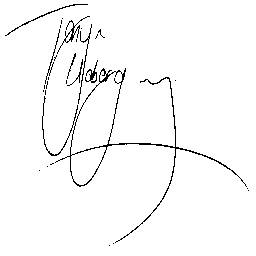

256 256


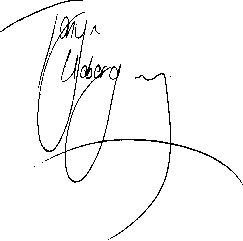

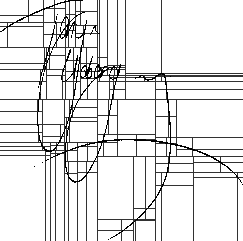

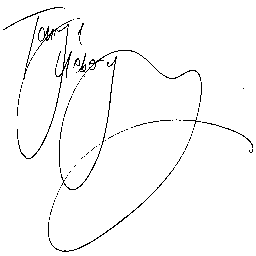

256 256


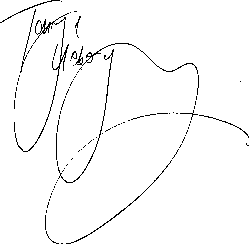

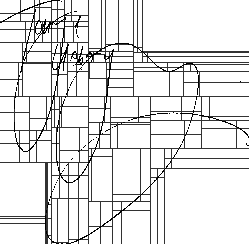

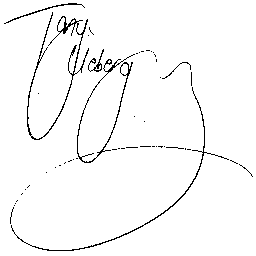

256 256


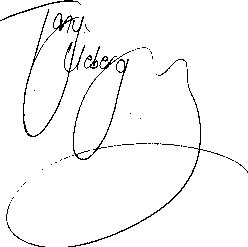

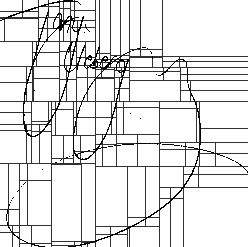

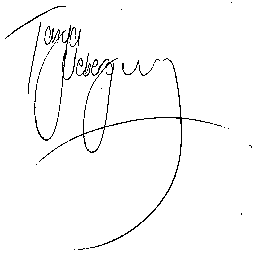

256 256


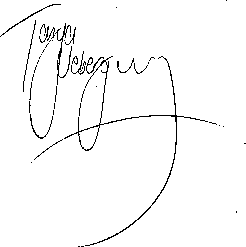

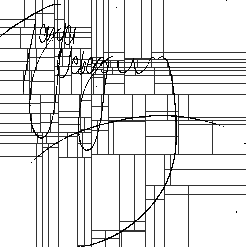

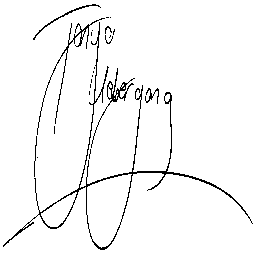

256 256


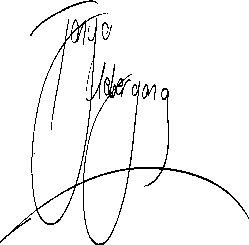

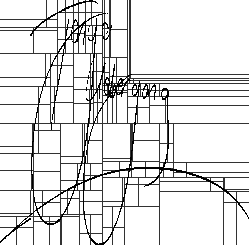

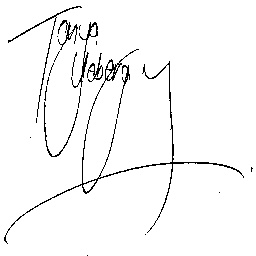

256 256


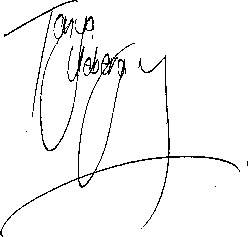

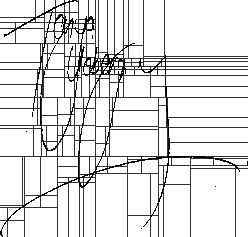

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import os.path
import shutil
import cv2
import glob
from google.colab import drive
import math

drive.mount('/content/drive/')
X_data = []
path = "/content/drive/My Drive/Test/*.png"
for file in glob.glob(path):
   print(file)
   image = cv2.imread(file,0)
   X_data.append (image)

for i in range(0,6):
  img = X_data[i]
  #img = cv2.imread("G012.png", 0)
  dimensions = (256,256)
  img = cv2.resize(img, dimensions)
  #cv2.imwrite("/content/R001.p",img) # save unprocessed image
  ret,img = cv2.threshold(img,240,255,cv2.THRESH_BINARY)
  cv2_imshow(img)

  height, width = img.shape
  print(height, width)

  left=width-1
  right = 0
  top = height-1
  bottom = 0
  for x in range (width-1):
    for y in range (height-1):
      if(img[y][x]==0):
        if x<left:
          left=x
        if x>right:
          right=x
        if y<top:
          top=y
        if y>bottom:
          bottom=y

  #print(top, bottom, left, right)
  img2 = img[top:bottom, left:right]
  cv2_imshow(img2)


  def findCentroid(image,  left,  right,  top,  bottom):
      cx=0
      cy=0
      n=0
      for x in range (left,right):
          for y in range (top, bottom):
              if(image[y][x]==0):
                  cx = cx+x
                  cy= cy+y
                  n=n+1
      
      if n==0:
          return(0,0)
      cx=cx/n
      cy=cy/n
      
      if (cx!=0 and cy!=0):
          for x in range (int(left), int(right)):
              if(img2[int(cy), x]==255):
                  img2[int(cy), x]=50

          for y in range (int(top), int(bottom)):
              if(img2[y, int(cx)]==255):
                  img2[y, int(cx)]=50
      return cx,cy
  def findTransitions  (myimage, x1, x2, y1, y2):
      prev = myimage[int(y1),int(x1)]
      n=0
      for x in range (int(y1), int(y2)-1):
          for y in range (int(x1), int(x2)-1):
              if myimage[x][y]==255 and prev == 0:
                  n=n+1
              prev = myimage[x][y]
      return n
  def findRatio (x1, x2, y1, y2):
      if y2-y1==0:
        return x2-x1
      else: 
        r = (x2-x1)/(y2-y1)
        return r
      
  def findBlacks(image, x1, x2, y1, y2):
      n = 0
      for x in range(int(y1), int(y2) - 1):
          for y in range(int(x1), int(x2) - 1):
              if image[x][y] ==0:
                  n = n + 1
      return n
    
  def findNormSize( x1, x2, y1, y2,b):
    s=0
    width= int(y2)-int(y1)
    height= int(x2)-int(x1)
    for x in range(int(y1), int(y2) - 1):
          for y in range(int(x1), int(x2) - 1):
            if b==0:
              s=0
            else:
              s= (width*height)/b
    return s
    
  def findCentAngle(cx,cy,y2,x1):
    dx=cx-x1
    dy=y2-cy
    if dx==0:
      a= math.pi/2
    else:
      a=math.atan(dy/dx)
    return a
    
  def findNormAngles(image, x1, x2, y1, y2):
    cx, cy = findCentroid(image, int(x1), int(x2), int(y1), int(y2))
    n = 0
    exp = 0
    b = findBlacks(image, x1, x2, y1, y2)
    for x in range(int(y1), int(y2) - 1):
        for y in range(int(x1), int(x2) - 1):
            if image[x][y] ==0:
              n += findCentAngle(cx,cy,y,x)
    if b == 0:
      exp = 0
    else:
      exp = n/b    
    return exp



  transitions = []
  allRatio = []
  allCentroids = []
  blacks=[]
  normalize=[]
  centAngle=[]
  normAngle = []
  def split(image,  left,  right,  top,  bottom,  depth=0):
      cx,  cy  =  findCentroid(image,  int(left),  int(right),  int(top),  int(bottom))

      if  depth  <  3:
          split(image,  left,  cx,  top,  cy,  depth  +  1) 
          split(image,  cx,  right,  top,  cy,  depth  +  1) 
          split(image,  left,  cx,  cy,  bottom,  depth  +  1) 
          split(image,  cx,  right,  cy,  bottom,  depth  +  1)
      else:
          allCentroids.append((cx,cy))
          t  =  findTransitions(image,  left,  right,  top,  bottom)
          r  =  findRatio(left,  right,  top,  bottom)
          b  =  findBlacks(image, left,  right,  top,  bottom)
          n  =  findNormSize(left,  right,  top,  bottom,  b)
          c  =  findCentAngle(cx, cy,  bottom,  left) 
          a  =  findNormAngles(image, left,  right,  top,  bottom)
          transitions.append(t)
          allRatio.append(r)
          blacks.append(b)
          normalize.append(n)
          centAngle.append(c)
          normAngle.append(a)
          
  split(img2, 0, img2.shape[1], 0, img2.shape[0])
  #print(allCentroids)
  #print(transitions)
  #print(allRatio)

  np.savetxt("/content/centroids/img%d.txt"%(i), allCentroids, fmt='%.05e')
  np.savetxt("/content/transitions/img%d.txt"%(i), transitions, fmt='%.05e')
  np.savetxt("/content/ratio/img%d.txt"%(i), allRatio, fmt='%.05e')
  np.savetxt("/content/blacks/img%d.txt"%(i), blacks, fmt='%.05e')
  np.savetxt("/content/normalize/img%d.txt"%(i), normalize, fmt='%.05e')
  np.savetxt("/content/centAngle/img%d.txt"%(i), centAngle, fmt='%.05e')
  np.savetxt("/content/normAngle/img%d.txt"%(i), normAngle, fmt='%.05e')
  
  cv2_imshow(img2)